# Notebook for new features development

In [1]:
import sys

repository_dp = '/home/giacomo/projects/ensemble_analysis/git/EnsembleTools'
sys.path.append(repository_dp)

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm
from dpet.analysis import EnsembleAnalysis
from dpet.logger import stream as st

# Load data

In [3]:
# Codes.
ens_codes = [
    "3a1g_B_prod_R1_fit",
    "3a1g_B_prod_R2_fit",
    "3a1g_B_prod_R3_fit"
]

# Instantiate the pipeline object.
pipeline = EnsembleAnalysis()

# Load some data.
data_dp = os.path.join(repository_dp, "ensemble_files", "3a1g_B")
pipeline.load_ensembles(
    input_dp=data_dp,
    codes=ens_codes,
    format="traj",
    topology_fp= os.path.join(data_dp, "3a1g_B.pdb"),  # Not needed when format="pdb".
    ext="xtc"
)

st.write("Loaded ensembles with the following codes:", pipeline.codes)

Loading data for 3a1g_B_prod_R1_fit.
Found 200 conformations.
Loading data for 3a1g_B_prod_R2_fit.
Found 200 conformations.
Loading data for 3a1g_B_prod_R3_fit.
Found 200 conformations.
Loaded ensembles with the following codes: ['3a1g_B_prod_R1_fit', '3a1g_B_prod_R2_fit', '3a1g_B_prod_R3_fit']


# Center-of-mass distances

# Ensemble: 3a1g_B_prod_R1_fit
features: (200, 741)
distance matrix: (40, 40)


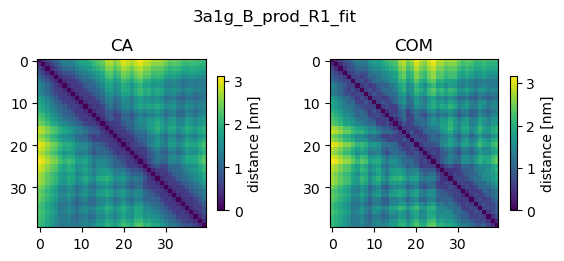

# Ensemble: 3a1g_B_prod_R2_fit
features: (200, 741)
distance matrix: (40, 40)


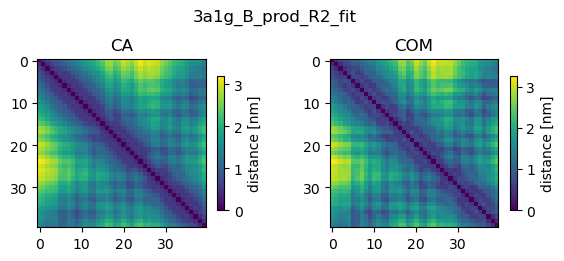

# Ensemble: 3a1g_B_prod_R3_fit
features: (200, 741)
distance matrix: (40, 40)


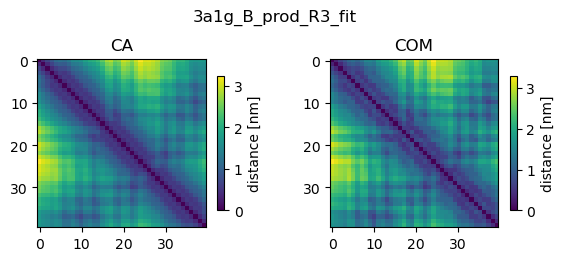

In [4]:
from dpet.featurization.distances import (featurize_com_dist,
                                          calc_com_dmap,
                                          calc_ca_dmap)

for code in pipeline.ensembles:
    traj = pipeline.ensembles[code].traj

    #--------------------------------------------------------------------
    # Compute (N, *) feature arrays. We should include this code in the -
    # EnsembleAnalysis class.                                           -
    #--------------------------------------------------------------------

    feat, names = featurize_com_dist(traj=traj, min_sep=2, get_names=True)
    print(f"# Ensemble: {code}")
    print("features:", feat.shape)

    #------------------------------------------------------
    # Compute (N, L, L) arrays. Mostly for visualization. -
    #------------------------------------------------------
    
    com_dmap = calc_com_dmap(traj=traj)
    com_dmap_mean = com_dmap.mean(axis=0)
    ca_dmap = calc_ca_dmap(traj=traj)
    ca_dmap_mean = ca_dmap.mean(axis=0)

    print("distance matrix:", com_dmap_mean.shape)
    fig, ax = plt.subplots(1, 2, figsize=(6, 2.5))
    fig.suptitle(code)
    im0 = ax[0].imshow(ca_dmap_mean)
    ax[0].set_title("CA")
    im1 = ax[1].imshow(com_dmap_mean)
    ax[1].set_title("COM")
    cbar = fig.colorbar(im0, ax=ax[0], shrink=0.8)
    cbar.set_label("distance [nm]")
    cbar = fig.colorbar(im1, ax=ax[1], shrink=0.8)
    cbar.set_label("distance [nm]")

    plt.tight_layout()
    plt.show()

# trRosetta angles

**NOTE**: i don't know how useful are these features. Maybe for some ensembles they are useful. I will also experiment with them and will give some feedback.

# Ensemble: 3a1g_B_prod_R1_fit
trOmega: (200, 306)
trChi: (200, 612)
plotting conformer 128
tr_omega angle matrix: (200, 40, 40)
tr_phi angle matrix: (200, 40, 40)


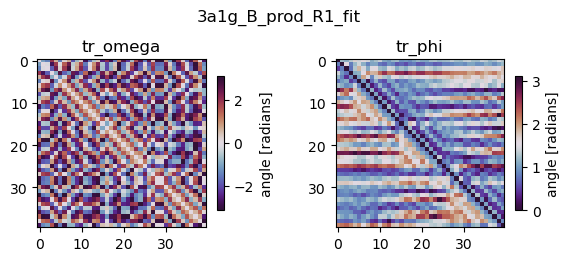

# Ensemble: 3a1g_B_prod_R2_fit
trOmega: (200, 306)
trChi: (200, 612)
plotting conformer 35
tr_omega angle matrix: (200, 40, 40)
tr_phi angle matrix: (200, 40, 40)


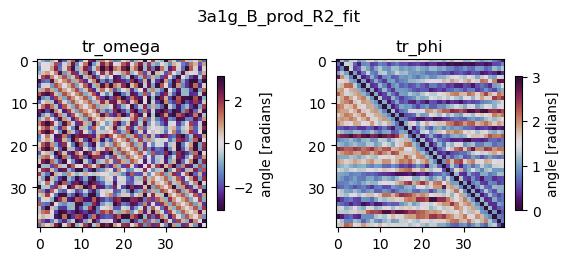

# Ensemble: 3a1g_B_prod_R3_fit
trOmega: (200, 306)
trChi: (200, 612)
plotting conformer 149
tr_omega angle matrix: (200, 40, 40)
tr_phi angle matrix: (200, 40, 40)


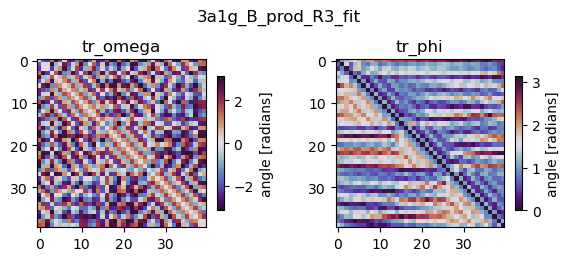

In [5]:
from dpet.featurization.angles import featurize_tr_angle


for code in pipeline.ensembles:

    traj = pipeline.ensembles[code].traj

    #---------------------------------
    # Compute (N, *) feature arrays. -
    #---------------------------------

    # trOmega angles.
    print(f"# Ensemble: {code}")
    feat, names = featurize_tr_angle(traj=traj,
                                     type="omega",
                                     ravel=True,
                                     min_sep=2,
                                     max_sep=0.25,
                                     get_names=True)
    print("trOmega:", feat.shape)
    
    # trPhi angles.
    feat, names = featurize_tr_angle(traj=traj,
                                     type="phi",
                                     ravel=True,
                                     min_sep=2,
                                     max_sep=0.25,
                                     get_names=True)
    print("trChi:", feat.shape)


    #------------------------------------------------------
    # Compute (N, L, L) arrays. Mostly for visualization. -
    #------------------------------------------------------
    
    conformer_idx = np.random.choice(len(traj))
    print(f"plotting conformer {conformer_idx}")
    tr_omega_map = featurize_tr_angle(traj=traj,
                                       type="omega",
                                       ravel=False,
                                       get_names=False)
    # tr_omega_map_aggr = tr_omega_map.mean(axis=0)
    tr_omega_map_aggr = tr_omega_map[conformer_idx]
    tr_phi_map = featurize_tr_angle(traj=traj,
                                     type="phi",
                                     ravel=False,
                                     get_names=False)
    # tr_phi_map_aggr = tr_phi_map.mean(axis=0)
    tr_phi_map_aggr = tr_phi_map[conformer_idx]

    print("tr_omega angle matrix:", tr_omega_map.shape)
    print("tr_phi angle matrix:", tr_phi_map.shape)
    fig, ax = plt.subplots(1, 2, figsize=(6, 2.5))
    fig.suptitle(code)
    # Use a periodic colormap for visualization.
    im0 = ax[0].imshow(tr_omega_map_aggr, cmap="twilight_shifted")
    ax[0].set_title("tr_omega")
    im1 = ax[1].imshow(tr_phi_map_aggr, cmap="twilight_shifted")
    ax[1].set_title("tr_phi")
    cbar = fig.colorbar(im0, ax=ax[0], shrink=0.8)
    cbar.set_label("angle [radians]")
    cbar = fig.colorbar(im1, ax=ax[1], shrink=0.8)
    cbar.set_label("angle [radians]")

    plt.tight_layout()
    plt.show()